In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('husl')

from sklearn.pipeline import Pipeline

# Pre-processing
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer, 
                                      MaxAbsScaler, RobustScaler)
from sklearn.preprocessing import PolynomialFeatures  # , Imputer 
from sklearn.experimental import enable_iterative_imputer  # to import IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.utils import resample

# Dimensionallity Reduction and Feature Extraction
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, NMF, SparsePCA, FastICA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap
from hdbscan import HDBSCAN
from umap import UMAP

# Clustering
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Post-analysis
from sklearn.metrics import (classification_report, confusion_matrix, plot_confusion_matrix,
                                accuracy_score, roc_curve, roc_auc_score, classification_report)
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [2]:
mnist_test_df = pd.read_csv('mnist_test.csv', delimiter=',', header=None)

mnist_train_df = pd.read_csv('mnist_train.csv', delimiter=',', header=None)
mnist_train_df.head(3)
y_test_df = mnist_test_df.iloc[:, 0]  # labels
X_test_df = mnist_test_df.iloc[:, 1:]  # data
y_test = y_test_df.values
X_train = X_test_df.values

y_train_df = mnist_train_df.iloc[:, 0]
X_train_df = mnist_train_df.iloc[:, 1:]
y_train = y_train_df.values
X_train = X_train_df.values

In [3]:
class data_class:
    
    def __init__(self, X_df, y_df=None):
        self.X_df = X_df
        self.y_df = y_df
        self.X = X_df.values
        if y_df is not None:
            self.y = y_df.values
            self.labels = y_df.unique()
        else:
            self.y = None
            
        self.init_X_df = X_df
        self.init_y_df = y_df
        
    def reset(self):
        self.X_df = self.init_X_df
        self.y_df = self.init_y_df
        self.X = self.init_X_df.values
        if self.init_y_df is not None:
            self.y = self.init_y_df.values 
        else:
            self.y = None
        
    def pairplot(self, labels=True, columns=None, **sns_pairplot_kwargs):
        
        if columns:
            data_df = self.X_df[columns].copy()
        else:
            data_df = self.X_df.copy()
            
        if labels==True and self.y_df is not None:
            data_df['plot_labels'] = self.y
          
        assert len(data_df.columns) <= 8, 'Too many data columns to plot. There has to be less than 8.'
        sns.pairplot(data_df, hue='plot_labels', **sns_pairplot_kwargs)
            

    ############## Preprocessing ##############
    def preprocess_OneHotEncoder(self, **ohe_kwargs):
        self.preprocess_OneHotEncoder.__func__. __doc__ = pd.get_dummies.__doc__
        self.X_df = pd.get_dummies(self.X_df, **ohe_kwargs)
    
    def preprocess_StandardScaler(self, **scaler_kwargs):
        self.preprocess_StandardScaler.__func__. __doc__ = StandardScaler.__doc__
        scaler = StandardScaler(**scaler_kwargs) 
        self.X = scaler.fit_transform(self.X)
        self.scaler = scaler

    def preprocess_MinMaxScaler(self, **scaler_kwargs):
        self.preprocess_MinMaxScaler.__func__. __doc__ = MinMaxScaler.__doc__
        scaler = MinMaxScaler(**scaler_kwargs) 
        self.X = scaler.fit_transform(self.X)
        self.scaler = scaler

    def preprocess_Normalizer(self, **scaler_kwargs):
        self.preprocess_Normalizer.__func__. __doc__ = Normalizer.__doc__
        scaler = Normalizer(**scaler_kwargs) 
        self.X = scaler.fit_transform(self.X)
        self.scaler = scaler

    def preprocess_MaxAbsScaler(self, **scaler_kwargs):
        self.preprocess_MaxAbsScaler.__func__. __doc__ = MaxAbsScaler.__doc__
        scaler = MaxAbsScaler(**scaler_kwargs) 
        self.X = scaler.fit_transform(self.X)
        self.scaler = scaler

    def preprocess_RobustScaler(self, **scaler_kwargs):
        self.preprocess_RobustScaler.__func__. __doc__ = RobustScaler.__doc__
        scaler = RobustScaler(**scaler_kwargs) 
        self.X = scaler.fit_transform(self.X)
        self.scaler = scaler
        
        
    def preprocess_SimpleImputer(self, **imputer_kwargs):
        self.preprocess_SimpleImputer.__func__. __doc__ = SimpleImputer.__doc__
        imputer = SimpleImputer(**imputer_kwargs) 
        self.X = imputer.fit_transform(self.X)
        self.imputer = imputer
        
    def preprocess_IterativeImputer(self, **imputer_kwargs):
        self.preprocess_IterativeImputer.__func__. __doc__ = IterativeImputer.__doc__
        imputer = IterativeImputer(**imputer_kwargs) 
        self.X = imputer.fit_transform(self.X)
        self.imputer = imputer
        
      
    ############## Features Extraction ##############
    def featextract_RandomForestRegressor(self, num_features=10, num_data=None, extract_features=False, plot=False, **rfr_kwargs):
        self.featextract_RandomForestRegressor.__func__. __doc__ = RandomForestRegressor.__doc__

        assert self.y is not None, 'RandomForestRegressor needs labels to predict.'
        
        if num_data is not None:
            # for faster computation
            X = self.X[:num_data]
            y = self.y[:num_data]
        else:
            X = self.X
            y = self.y
        model = RandomForestRegressor(**rfr_kwargs)
        model.fit(X, y)
        self.rfr_model = model

        features = self.X_df.columns
        importances = model.feature_importances_
        indices = np.argsort(importances)[-num_features:]  # top "num_features" number of features
        extracted_features = [features[i] for i in indices]
        
        if extract_features:
            self.X_df = self.X_df[extracted_features]
            self.X = self.X.T[indices].T

        if plot:
            fig, ax = plt.subplots(figsize=(8, 6))
            plt.title(f'Feature Importances', fontsize=18)
            plt.bar(range(len(indices)), importances[indices], color='b', align='center')
            plt.xticks(range(len(indices)), extracted_features)
            plt.ylabel('Relative Importance', fontsize=16)
            plt.show()
            
    
    ############## Dimensionality Reduction ##############
    def dimreduc_PCA(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_PCA.__func__. __doc__ = PCA.__doc__
        reducer = PCA(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_NMF(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_NMF.__func__. __doc__ = NMF.__doc__
        reducer = NMF(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_SparsePCA(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_SparsePCA.__func__. __doc__ = SparsePCA.__doc__
        reducer = SparsePCA(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_FastICA(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_FastICA.__func__. __doc__ = FastICA.__doc__
        reducer = FastICA(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_FactorAnalysis(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_FactorAnalysis.__func__. __doc__ = FactorAnalysis.__doc__
        reducer = FactorAnalysis(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_Isomap(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_Isomap.__func__. __doc__ = Isomap.__doc__
        reducer = Isomap(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_TSNE(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_TSNE.__func__. __doc__ = TSNE.__doc__
        reducer = TSNE(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
            
    def dimreduc_UMAP(self, plot=False, **dimreduc_kwargs):
        self.dimreduc_UMAP.__func__. __doc__ = UMAP.__doc__
        reducer = UMAP(**dimreduc_kwargs)
        self.X_reduced = reducer.fit_transform(self.X)
        self.reducer = reducer
        
        if plot:
            reducer_name = str(reducer).split('(')[0]
            plot_components(self.X_reduced, y=self.y, reducer_name=reducer_name, comp1=0, comp2=1)
        
        
    ############## Clustering ##############
    def cluster_KMeans(self, plot=False, **cluster_kwargs):
        self.cluster_KMeans.__func__. __doc__ = KMeans.__doc__
        model = KMeans(**cluster_kwargs)
        clustering_labels = model.fit_predict(self.X_reduced)
        self.cluster_model = model
        
        if plot:
            model_name = str(model).split('(')[0]
            plot_clusters(self.X_reduced, clustering_labels, model_name)
        
    ############## Classifiers ##############
    def clf_KNeighborsClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_KNeighborsClassifier.__func__. __doc__ = KNeighborsClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = KNeighborsClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_SVC(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_SVC.__func__. __doc__ = SVC.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = SVC(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_DecisionTreeClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_DecisionTreeClassifier.__func__. __doc__ = DecisionTreeClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = DecisionTreeClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_RandomForestClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_RandomForestClassifier.__func__. __doc__ = RandomForestClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = RandomForestClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_AdaBoostClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_AdaBoostClassifier.__func__. __doc__ = AdaBoostClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = AdaBoostClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_QuadraticDiscriminantAnalysis(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_QuadraticDiscriminantAnalysis.__func__. __doc__ = QuadraticDiscriminantAnalysis.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = QuadraticDiscriminantAnalysis(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels) 
            
    def clf_MLPClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_MLPClassifier.__func__. __doc__ = MLPClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = MLPClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            plot_classifier(clf, X_test, y_test, self.labels)
            
    def clf_XGBClassifier(self, split_training_set=True, test_size=0.3, 
                                         cross_validate=True, cv_num=5, plot=True, **clf_kwargs):
        self.clf_XGBClassifier.__func__. __doc__ = XGBClassifier.__doc__ 
        if split_training_set:
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size)
        clf = XGBClassifier(**clf_kwargs)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        self.scaler = clf
        
        validate(clf, self.X, self.y, cv_num, cross_validate)
        if plot:
            clf_name = str(clf).split('(')[0]
            plot_classifier(clf, X_test, y_test, self.labels, clf_name)
            
            
def plot_components(X_reduced, y=None, reducer_name='', comp1=0, comp2=1):
    
    # to avoid strings
    if y is not None:
        labels_dict = {label:i for i, label in enumerate(np.unique(y))}
        labels = [labels_dict[label] for label in y]
    else:
        labels=None
    
    exp_var = np.var(X_reduced, axis=0)/np.sum(np.var(X_reduced, axis=0))
    print(f'Explained Variance Fraction: {exp_var}')

    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(X_reduced[:, comp1], X_reduced[:, comp2], c=labels, cmap=plt.cm.Set1, edgecolor='k')
    ax.set_title(f"Dimensionality Reduction {reducer_name}", fontsize=18)
    ax.set_xlabel(f"Eigen-vector {comp1+1}", fontsize=16)
    ax.set_ylabel(f"Eigen-vector {comp2+1}", fontsize=16)
    legend = ax.legend(*scatter.legend_elements(), ncol=2)
    ax.add_artist(legend)
    plt.show()   
    
def plot_clusters(X_reduced, labels, model_name='', comp1=0, comp2=1):
    
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors)
    frame = plt.gca()
    ax.set_title(f'Clustering {model_name}', fontsize=18)
    ax.set_xlabel(f"Eigen-vector {comp1+1}", fontsize=16)
    ax.set_ylabel(f"Eigen-vector {comp2+1}", fontsize=16)
    plt.show()
        
def validate(clf, X, y, cv_num, cross_validate):
    
    if cross_validate:
        scores = cross_val_score(clf, X, y, cv=cv_num)
        score = np.round(scores.mean(), 3)
        std = np.round(scores.std(), 3)
        print(f'Score: {score} +/- {std}')
    else:
        score = np.round(clf.score(X_test, y_test), 3)
        print(f'Score: {score}')

def plot_classifier(clf, X_test, y_test, labels, clf_name=''):

    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=labels, 
                              cmap=plt.cm.Blues, normalize='true', ax=ax)
    plt.title(f'Classifier {clf_name}', fontsize=18)
    plt.xticks(rotation='vertical')
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

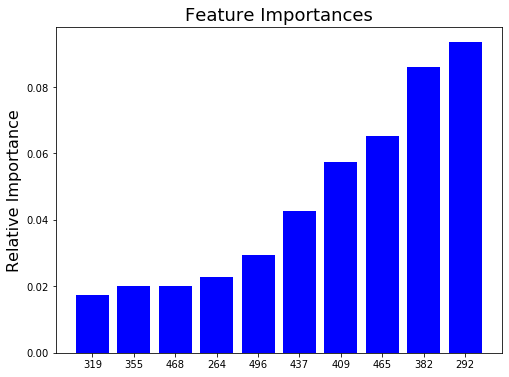

/home/tomas/anaconda3/envs/pisco/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tomas/anaconda3/envs/pisco/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tomas/anaconda3/envs/pisco/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/tomas/anaconda3/envs/pisco/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Score: 0.525 +/- 0.032


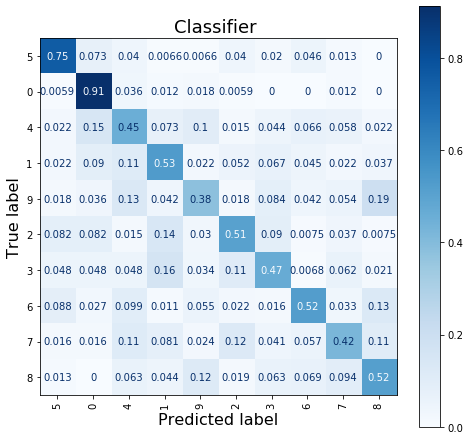

In [565]:
dc = data_class(X_train_df.loc[:5000], y_train_df.loc[:5000])
dc.preprocess_MinMaxScaler()
dc.featextract_RandomForestRegressor(num_features=10, num_data=200, extract_features=True, plot=True)
dc.clf_MLPClassifier()

Explained Variance Fraction: [0.45533975 0.31774508 0.22691517]


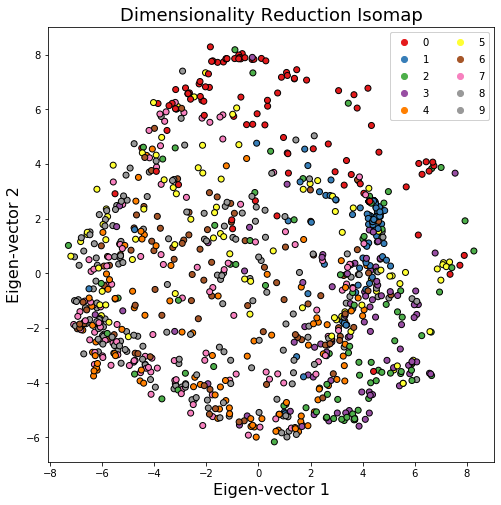

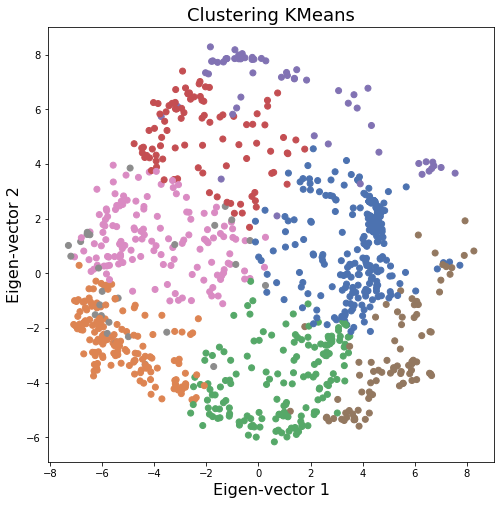

In [548]:
dc.dimreduc_Isomap(True, **{'n_components':3})
dc.cluster_KMeans(plot=True)